<a href="https://colab.research.google.com/github/DavidSenseman/BIO5853/blob/master/Lesson_03_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---------------------------
**COPYRIGHT NOTICE:** This Jupyterlab Notebook is a Derivative work of [Jeff Heaton](https://github.com/jeffheaton) licensed under the Apache License, Version 2.0 (the "License"); You may not use this file except in compliance with the License. You may obtain a copy of the License at

> [http://www.apache.org/licenses/LICENSE-2.0](http://www.apache.org/licenses/LICENSE-2.0)

Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language governing permissions and limitations under the License.

------------------------

# **BIO 5853: Biostatistics**

##### **Module 3: Inference**

* Instructor: [David Senseman](mailto:David.Senseman@utsa.edu), [Department of Integrative Biology](https://sciences.utsa.edu/integrative-biology/), [UTSA](https://www.utsa.edu/)


### Module 3 Material

* Part 3.1: Confidence Intervals
* Part 3.2: Hypothesis Testing
* **Part 3.3: Comparison of Two Means**
* Part 3.4: Analysis of Variance (ANOVA)
* Part 3.5: Nonparametric Methods
* Part 3.6: Inference on Proportions
* Part 3.7: Contingency Tables
* Part 3.8: Correlation
* Part 3.9: Simple Linear Regression
* Part 3.10: Multiple Linear Regression
* Part 3.11: Logistic Regression
* Part 3.12: Survival Analysis

## Google CoLab Instructions

The following code ensures that Google CoLab is running the correct version of TensorFlow.
  Running the following code will map your GDrive to ```/content/drive```.

In [1]:
# YOU MUST RUN THIS CELL FIRST
try:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
    from google.colab import auth
    auth.authenticate_user()
    COLAB = True
    print("Note: using Google CoLab")
    %tensorflow_version 2.x
    import requests
    gcloud_token = !gcloud auth print-access-token
    gcloud_tokeninfo = requests.get('https://www.googleapis.com/oauth2/v3/tokeninfo?access_token=' + gcloud_token[0]).json()
    print(gcloud_tokeninfo['email'])
except:
    print("Note: not using Google CoLab")
    COLAB = False

Note: not using Google CoLab


# **Part 3.3: Comparison of Two Means**

In the preceding chapter we used a statistical test of hypothesis to compare the unknown mean of a single population to some fixed, known value $\mu_0$. In practical applications, however, it is far more common to compare the means of two different populations, both of which are unknown.

(Pagano, Marcello; Gauvreau, Kimberlee; Mattie, Heather. Principles of Biostatistics (p. 253). CRC Press. Kindle Edition.)

## **Paired Samples**

The distinguishing characteristic of paired samples is that, for each observation in the first group, there is a corresponding observation in the second group. In the technique known as **_self-pairing_**,  measurements are taken on a single subject at two distinct points in time. One common example of self-pairing is the “before and after” experiment, in which each individual is examined before a  treatment or intervention has been applied, and then again after the treatment has been completed. A second type of pairing occurs when an investigator matches the subjects in one group with those in a second group so that the members of a pair are as much alike as possible with respect to important characteristics such as age and sex.  

Pairing is frequently employed in an attempt to control for extraneous sources of variation that might otherwise influence the results of the comparison. If measurements for two groups are made on the same subjects rather than different ones, a certain amount of biological variability is eliminated. We do not have to worry about the fact that one group is older than the other, or that one has more males and the other more females. This helps to make the comparison more precise. 

Consider a population of children with serious heart disease, who have all undergone surgery to correct a congenital defect. Many such children have been observed to have depressed exercise capacity. While this might be due to their heart condition, another contributory factor could be that their parents consider them to be excessively fragile, and therefore restrict their level of physical activity. Among children for whom exercise does not impose a health risk, participation in a rehabilitation program in a safe environment might increase exercise capacity, improving overall health. 

>(Pagano, Marcello; Gauvreau, Kimberlee; Mattie, Heather. Principles of Biostatistics (p. 227). CRC Press. Kindle Edition.) 

### Example 1: Read Datafile

The code in the cell below uses the Pandas function `pd.read_csv(filename)` to read the data file `PeakWork.csv` stored on the course HTTPS server https://biologicslab.co. As the file is read, it is stored in a Pandas DataFrame called `pwDF`. 

This file contains the data from the population of children with serious heart disease, who have all undergone surgery to correct a congenital defect and participated in a study involving physical activity as part of a rehabilitation program. This data will be used in many of the examples and exericsed in this lesson.

In [36]:
# Example 1: Read datafile

import pandas as pd

# Read the datafile 
pwDF = pd.read_csv(
    "https://biologicslab.co/BIO5853/data/PeakWork.csv",
#    index_col=0,
    sep=',',
    na_values=['NA','?'])

# Set max rows and max columns
pd.set_option('display.max_rows', 6)
pd.set_option('display.max_columns', 4) 

# Display DataFrame
display(pwDF)

,Sample 1,Sample 2
0,154,165
1,152,181
2,143,157
...,...,...
13,58,68
14,55,69
15,52,60


If the code is correct, you should see the following table.

![____](https://biologicslab.co/BIO5853/images/module_03/lesson_03_3_image03.png)

The output above shows the results of a study in which each patient underwent two exercise tests. This self-pairing eliminated any distortions or biases that might be have been introduced by comparing exercise capacity for two groups of patients who differ with respect to age, sex, or severity of heart disease. Because the data consist of paired samples, the paired _t_-test is the appropriate method of analysis.  

### **Exercise 1A: Read Datafile**

In the cell below, use the Pandas function `pd.read_csv(filename)` to read a data file called `sf_36.csv` stored on the course HTTPS server https://biologicslab.co. As the file is read, store in a Pandas DataFrame called `sf36DF`.

#### **Data Description**

These data are the distributions of sf-36 mental component summary scores six months after liver transplantation for the populations of adult patients treated by usual care versus exercise and dietary counseling. The distributions are both approximately normal; denote the mean score of the usual care population by $/mu_1$ and the mean score of the population receiving counseling by $/mu_2$. The standard deviations of the two populations – σ1 and σ2 – are  unknown, but are assumed to be equal. 

_Code Hints:_

1. You will need to uncomment the following line:
~~~text
    index_col=0,
~~~
Otherwise you can reuse the code in Example 1 'as is' after changing the name of the datafile and the DataFrame.


In [32]:
# Insert your code for Exercise 1A here

import pandas as pd

# Read the datafile 
sf36DF = pd.read_csv(
    "https://biologicslab.co/BIO5853/data/sf_36.csv",
    index_col=0,
    sep=',',
    na_values=['NA','?'])

# Set max rows and max columns
pd.set_option('display.max_rows', 6)
pd.set_option('display.max_columns', 4) 

# Display DataFrame
display(sf36DF)

,m,sd,...,lower,group
1,49.299999,11.6,...,46.535389,1
2,53.299999,7.8,...,51.060730,2


If your code is correct, you should see the following output:

![____](https://biologicslab.co/BIO5853/images/module_03/lesson_03_3_image15.png)

### **Exercise 1B: Read Datafile**

In the cell below, use the Pandas function `pd.read_csv(filename)` to read a data file called `Platelet.txt` stored on the course HTTPS server https://biologicslab.co. As the file is read, store in a Pandas DataFrame called `paDF`. To sucessfully read this text file, you will have to add the argument `sep='t'` as shown here:

~~~text
# Read the datafile 
paDF = pd.read_csv(
    "https://biologicslab.co/BIO5853/data/Platelet.txt",
    sep='\t',
    na_values=['NA','?'])
~~~

The argument `sep` species the how data in a text file is separated. In a `CSV` file, the separator is a comma `,` which is the default value for `sep`, so there is no need to define it. However in the file `Platelet.txt`, the separator is a tab which is specified as `'\t'`.

#### **Data Description**

This data is from a clinical study on tobacco smoke effects on platelet function. In this study, it was hypothesized that the higher frequency of arterial thrombosis in cigarette smokers could be partially explained by increased platelet aggregation caused by smoking. To test this hypothesis, platelet aggregation was measured in each individual before (**"Before"**) and after (**"After"**) smoking a cigarette.  

In [37]:
# Insert your code for Exercise 1B here

import pandas as pd

# Read the datafile 
paDF = pd.read_csv(
    "https://biologicslab.co/BIO5853/data/Platelet.txt",
#   index_col=0,
    sep='\t',
    na_values=['NA','?'])

# Set max rows and max columns
pd.set_option('display.max_rows', 6)
pd.set_option('display.max_columns', 4) 

# Display DataFrame
display(paDF)

,Before,After
0,25,27
1,25,29
2,27,37
...,...,...
8,52,61
9,60,59
10,28,43


If the code is correct, you should see the following table.

![____](https://biologicslab.co/BIO5853/images/module_03/lesson_03_3_image11.png)

### Example 2: Paired-sample Plot

Example 2 shows how to recreate **Figure 11.1** using Python. 

From your textbook on page 254

>Consider a population of children with serious heart disease, who have all undergone surgery to correct a congenital defect. Many such children have been observed to have depressed exercise capacity. While this might be due to their heart condition, another contributory factor could be that their parents consider them to be excessively fragile, and therefore restrict their level of physical activity. Among children for whom exercise does not impose a health risk, participation in a rehabilitation  program in a safe environment might increase exercise capacity, improving overall health.
>
>In a study designed to examine this hypothesis, peak work rate – a measure of exercise intensity, defined as the maximum amount of energy expended on a standard laboratory bicycle test – was  measured for each child prior to the start of a 12-week exercise rehabilitation program, and then  again at the end of the program
>
>Rather than consider the two sets of observations to be distinct samples, we focus on the difference in measurements within each pair. The two measurements of peak work rate for _n_ = 16 children participating in a cardiac rehabilitation  program are shown in **Figure 11.1**.

![____](https://biologicslab.co/BIO5853/images/module_03/lesson_03_3_image01.png)

**FIGURE 11.1** Change in peak work rate from baseline to the end of a 12-week cardiac rehabilitation program for 16 children with serious congenital heart disease  

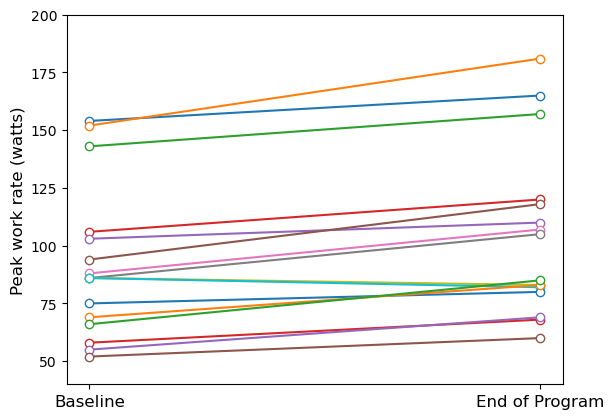

In [38]:
# Example 2: Paired-sample plot

import numpy as np
import matplotlib.pyplot as plt


# Create numpy arrays from DataFrame
x1 = pwDF['Sample 1'].to_numpy()
x2 = pwDF['Sample 2'].to_numpy()

# Sample data
data = np.array([x1 , x2])

# Labels for the x-axis
labels = ['Baseline', 'End of Program']

# Create a figure and axis
fig, ax = plt.subplots()

# Plot each row of data
for i in range(data.shape[1]):
    ax.plot(labels, data[:, i], 
            markerfacecolor='white',
            marker='o')

# Set the y-axis limits
ax.set_ylim(40, 200)

# Add axis labels
plt.xticks(fontsize=12)
plt.ylabel('Peak work rate (watts)', fontsize=12)

# Set custom y-axis tick locations and labels
plt.yticks([50, 75, 100, 125, 150, 175, 200], 
           ['50', '75', '100', '125', '150', '175', '200'])

# Show plat
plt.show()


If the code is correct, you should see the following plot.

![____](https://biologicslab.co/BIO5853/images/module_03/lesson_03_3_image02.png)

### **Exercise 2: Paired-sample Plot**

In the cell below, create a Paired-sample plot of your Platelet data. Since your aren't trying to recreate a particular figure in a textbook, you can **_delete_** the following code chunk:

~~~text
# Set custom y-axis tick locations and labels
plt.yticks([50, 75, 100, 125, 150, 175, 200], 
           ['50', '75', '100', '125', '150', '175', '200'])
~~~

You will also need to set your y-limits as follows:

~~~text
# Set the y-axis limits
ax.set_ylim(20, 90)
~~~

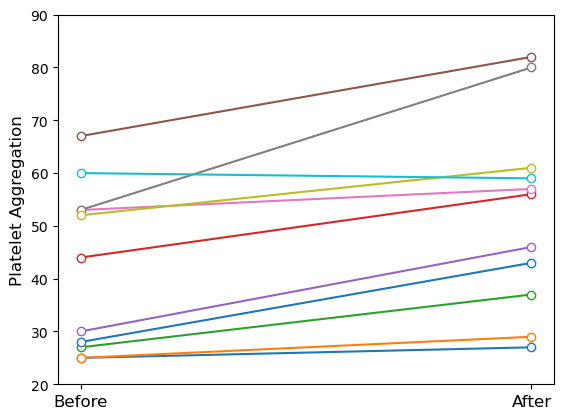

In [39]:
# Insert your code for Exercise 2 here

import numpy as np
import matplotlib.pyplot as plt

# Create numpy arrays from DataFrame
x1 = paDF['Before'].to_numpy()
x2 = paDF['After'].to_numpy()

# Sample data
data = np.array([x1 , x2])

# Labels for the x-axis
labels = ['Before', 'After']

# Create a figure and axis
fig, ax = plt.subplots()

# Plot each row of data
for i in range(data.shape[1]):
    ax.plot(labels, data[:, i], 
            markerfacecolor='white',
            marker='o')

# Set the y-axis limits
ax.set_ylim(20, 90)

# Add axis labels
plt.xticks(fontsize=12)
plt.ylabel('Platelet Aggregation', fontsize=12)

# Show plat
plt.show()


If your code is correct, you should see the following plot.

![____](https://biologicslab.co/BIO5853/images/module_03/lesson_03_3_image12.png)

### Example 3: Plot Histogram  

The code in Example 3 shows how to use Python to recreate the histogram shown in **Figure 11.2** on page 257 in your textbook.

![____](https://biologicslab.co/BIO5853/images/module_03/lesson_03_3_image05.png)

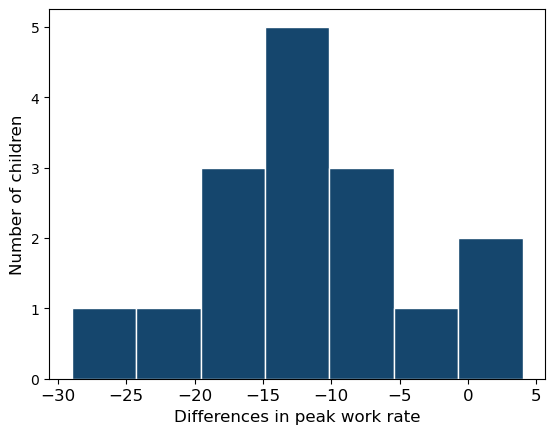

In [40]:
# Example 3: Plot 

import matplotlib.pyplot as plt
import numpy as np

# Define variables
numBins=7
color_1 = '#15466d' # Dark blue

# Create numpy arrays from DataFrame
x1 = pwDF['Sample 1'].to_numpy()
x2 = pwDF['Sample 2'].to_numpy()

# Compute the difference
diff = x1 - x2

# Set-up plot environment
fig, ax = plt.subplots()

# Plot histogram
n, bins, patches = plt.hist(diff, numBins, density=False, 
                            facecolor=color_1,
                            edgecolor="white",
                            alpha=1.0)
# Turn off grid
plt.grid(False)

# Add axis labels
plt.xticks(fontsize=12)
plt.xlabel('Differences in peak work rate', fontsize=12)
plt.ylabel('Number of children', fontsize=12)

# Show plot
plt.show()


If the code is correct, you should see the following histogram:

![____](https://biologicslab.co/BIO5853/images/module_03/lesson_03_3_image04.png)

### **Exercise 3: Plot Histogram**  

In the cell below, use Python to create a histogram of your platelet aggregation data in `paDF`.

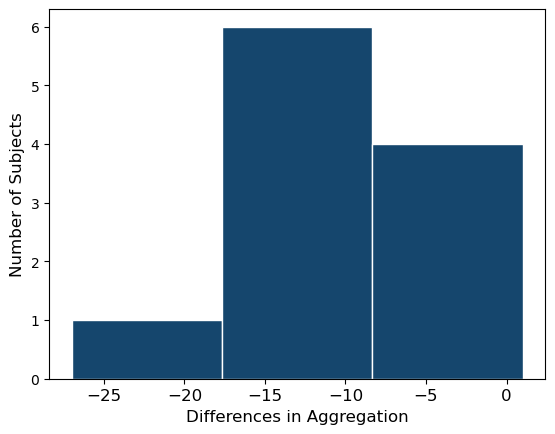

In [41]:
# Insert your code for Exercise 3 here

import matplotlib.pyplot as plt
import numpy as np

# Define variables
numBins=3
color_1 = '#15466d' # Dark blue

# Create numpy arrays from DataFrame
x1 = paDF['Before'].to_numpy()
x2 = paDF['After'].to_numpy()

# Compute the difference
diff = x1 - x2

# Set-up plot environment
fig, ax = plt.subplots()

# Plot histogram
n, bins, patches = plt.hist(diff, numBins, density=False, 
                            facecolor=color_1,
                            edgecolor="white",
                            alpha=1.0)
# Turn off grid
plt.grid(False)

# Add axis labels
plt.xticks(fontsize=12)
plt.xlabel('Differences in Aggregation', fontsize=12)
plt.ylabel('Number of Subjects', fontsize=12)

# Show plot
plt.show()


If your code is correct, you should see the following histogram:

![____](https://biologicslab.co/BIO5853/images/module_03/lesson_03_3_image13.png)

As was seen above, in Figure **11.2**, the differences are symmetric and can be considered to come from an approximately normally distribution.

### Example 4: Perform Paired-sample t-Test 

The code for performing a Paired-sample _t_-test is shown in the next cell. The code will be used to solve the problem shown on page 256 in your textbook.

>We wish to test whether these two means are equal, we can write the null hypothesis as

$$ H_0: δ = 0 $$  

>and the alternative hypothesis as

$$ H_A: δ \not= 0. $$  

>Assuming that the population of differences is normally distributed, H0 may be evaluated by computing the test statistic

$$ t = \frac{\bar{d} - \delta}{\frac{s_d}{\sqrt{n}}} $$  

Pagano, Marcello; Gauvreau, Kimberlee; Mattie, Heather. Principles of Biostatistics (p. 256). CRC Press. Kindle Edition. 


In [47]:
# Example 4: Paired-sample t-Test

import numpy as np
import scipy.stats as stats

# Create numpy arrays from DataFrame
x1 = pwDF['Sample 1'].to_numpy()
x2 = pwDF['Sample 2'].to_numpy()

# Compute the difference
mean_diff = np.mean(x2 - x1)

# Perform the paired sample t-test
t_stat, p_value = stats.ttest_rel(x1, x2)

print("----Performing Paired-Sample t-Test------")
print(f'Mean difference (d\u0305): {mean_diff:.2f}')
print(f'T-statistic: {t_stat:.2f}')
print(f'P-value: {p_value:.5f}')


----Performing Paired-Sample t-Test------
Mean difference (d̅): 12.50
T-statistic: -5.67
P-value: 0.00004


If the code is correct, you should see the following output:

~~~text
----Performing Paired-Sample t-Test------
Mean difference (d̅): 12.50
T-statistic: -5.67
P-value: 0.00004
~~~

In your textbook, the mean difference ($\bar{d}$) is shown as `12.00`. The value `12.50` watts shown in the output is due to small differences in the data used, not in the statistical code.

### **Exercise 4: Perform Paired-sample t-Test** 

In the cell below, perform a paired-sample _t_-test on your platelet aggregation data stored in the DataFrame `paDF`. Let `x1` be the 'Before' data, and `x2` be the 'After' data.

In [48]:
# Insert your code for Exercise 4 here

import numpy as np
import scipy.stats as stats

# Create numpy arrays from DataFrame
x1 = paDF['Before'].to_numpy()
x2 = paDF['After'].to_numpy()

# Compute the difference
mean_diff = np.mean(x2 - x1)

# Perform the paired sample t-test
t_stat, p_value = stats.ttest_rel(x1,x2)

print("----Performing Paired-Sample t-Test------")
print(f'Mean difference (d\u0305): {mean_diff:.2f}')
print(f'T-statistic: {t_stat:.2f}')
print(f'P-value: {p_value:.5f}')

----Performing Paired-Sample t-Test------
Mean difference (d̅): 10.27
T-statistic: -4.27
P-value: 0.00163


If your code is correct, you should see the following output:

~~~text
----Performing Paired-Sample t-Test------
Mean difference (d̅): 10.27
T-statistic: -4.27
P-value: 0.00163
~~~

At the 0.01 confidence level, we can reject the null hypothesis and conclude that the
test result is statistically significant. In this case, we interpret this as a statistically
significant relationship between smoking and platelet aggregation.

![____](https://biologicslab.co/BIO5853/images/module_03/lesson_03_3_image06.png)

## **Independent Samples**

Now suppose that we are interested in comparing health-related quality of life for two distinct populations of adults undergoing liver transplantation. After surgery, one group receives usual care, and the  other is treated with a combined intervention of exercise and dietary counseling. Six months after surgery, all patients complete the Medical Outcomes Study Short Form questionnaire (sf-36), which provides summary scores measuring both physical and mental health. The mental component  summary (mcs) score – which incorporates information about social functioning, limitations due to emotional problems, general mental health, and vitality – is scaled to have an approximately normal distribution in the general population. Higher scores indicate better health. In this study, the two underlying populations of mcs scores are independent. (For each observation in the first group, there is not a corresponding observation in the second group.) If the population of liver transplant patients treated by usual care has mean mcs score $\mu_1$ and the population treated with exercise and dietary counseling has mean $\mu_2$, we might again be interested in testing the null hypothesis that the two population means are identical.This can be expressed as either 

$$ H_0: \mu_1 - \mu_2 = 0 $$

or  

$$ H_0:  \mu_1 = \mu_2 $$

The alternative hypothesis is  

$$ H_A: \mu_1 \not= \mu_2 = 0 $$

or  

$$ H_A: \mu_1 \not= \mu_2.  $$

From the population with mean $\mu_1$ and standard deviation $\sigma_1$ we draw a random sample of size $n_1$. The mean of this sample is denoted by $\bar{x}_1$ and its standard deviation by $s_1$. Similarly, we  select a random sample of size $n_2$ from the population with mean $\mu_2$ and standard deviation $\sigma_2$. The mean of this sample is represented by $\bar{x}_2$ and its standard deviation by $s_2$. Note that the numbers of observations in each sample – $n_1$ and $n_2$ – need not be the same. 

![____](https://biologicslab.co/BIO5853/images/module_03/lesson_03_3_image07.png)

## **Equal Variance**

We first consider the situation in which it is either known or is reasonable to assume that the two  population variances are identical. Recall that, for a single population with mean $\mu$ and standard deviation $\sigma$, the central limit theorem states that the sample mean $X$ is approximately normally  distributed – assuming that $n$ is large enough – with mean $\mu$ and standard error $\sqrt{\frac{\sigma^2}{n}} = \frac{\sigma}{\sqrt{n}}
$. As  a result,  

$$ Z = \frac{\bar{X} - \mu}{\sigma / \sqrt{n}} $$

### Example 5: Calculate Margin of Error

If you happen to know the standard deviation $σ$ of the sampling distribution of the mean, you should use the **_one-sample z-test_** for hypothesis testing using this equation:

$$ z = \frac{\bar{x} - \mu}{\sigma / \sqrt{n}} $$

is the outcome of a standard normal random variable. When we are dealing with samples from two independent populations, an extension of the central limit theorem says that the difference in sample means $\bar{X}_1 − \bar{X}_2$ is approximately normal with mean $\mu_1 - \mu_2$ and the standard error $\sqrt{\frac{\sigma_1^2}{n_1} + \frac{\sigma_2^2}{n_2}}$


The code in the cell below shows how to compute the margin of error.

In [ ]:
----Solving Margin of Error-----------------------------
Mean 1 (x̅) = 92.06
Mean 2 (x̅) = 104.56
Standard deviation 1 (s) = 31.73
Standard deviation 2 (s) = 31.73

If your code is correct, you should see the following output:

![____](https://biologicslab.co/BIO5853/images/module_03/lesson_03_3_image15.png)

In [17]:
# Example 5: Calculate margin of error

import math

# Create numpy arrays from DataFrame
x1 = pwDF['Sample 1'].to_numpy()
x2 = pwDF['Sample 2'].to_numpy()

# Define values
mean = 92.06
std_dev = 104.56
n = 70
confidence_level = 0.95

# Z-score for 95% confidence level
z_score = 1.96

# Calculate the standard error
standard_error = std_dev / math.sqrt(n)

# Calculate the margin of error
margin_of_error = z_score * standard_error

# Calculate the confidence interval
lower_bound = mean - margin_of_error
upper_bound = mean + margin_of_error

# Print the results
print("----Solving Margin of Error-----------------------------")
print(f"Mean (x\u0305) = {mean:.2f}")
print(f"Standard deviation (s) = {std_dev:.2f}")
print(f"Sample size (n) = {n}.")
print(f"95% Confidence Interval: ({lower_bound:.3f}, {upper_bound:.3f})")
print(f"Margin of Error: {margin_of_error:.2f}")


----Solving Margin of Error-----------------------------
Mean (x̅) = 92.06
Standard deviation (s) = 104.56
Sample size (n) = 70.
95% Confidence Interval: (67.565, 116.555)
Margin of Error: 24.49


If the code is correct, you should see the following output:
~~~text
----Solving Margin of Error-----------------------------
Mean (x̅) = 49.30
Standard deviation (s) = 11.60
Sample size (n) = 70.
95% Confidence Interval: (46.583, 52.017)
Margin of Error: 2.72
~~~

### **Exercise 5: Compute Margin of Error**

In the cell below, compute the margin of error for a population mean = `53.3`, a standard deviation = `7.8` with a sample size = `49` and a confidence level = `95%`.

In [11]:
# Insert your code for Exercise 5 here

import math

# Define values
pop_mean = 53.3
std_dev = 7.8
n = 49
confidence_level = 0.95

# Z-score for 95% confidence level
z_score = 1.96

# Calculate the standard error
standard_error = std_dev / math.sqrt(n)

# Calculate the margin of error
margin_of_error = z_score * standard_error

# Calculate the confidence interval
lower_bound = mean - margin_of_error
upper_bound = mean + margin_of_error

# Print the results
print("----Solving Margin of Error-----------------------------")
print(f"Mean (x\u0305) = {mean:.2f}")
print(f"Standard deviation (s) = {std_dev:.2f}")
print(f"Sample size (n) = {n}.")
print(f"95% Confidence Interval: ({lower_bound:.3f}, {upper_bound:.3f})")
print(f"Margin of Error: {margin_of_error:.2f}")


----Solving Margin of Error-----------------------------
Mean (x̅) = 49.30
Standard deviation (s) = 7.80
Sample size (n) = 49.
95% Confidence Interval: (47.116, 51.484)
Margin of Error: 2.18


If your code is correct, you should see the following output:
~~~text
----Solving Margin of Error-----------------------------
Mean (x̅) = 49.30
Standard deviation (s) = 7.80
Sample size (n) = 49.
95% Confidence Interval: (47.116, 51.484)
Margin of Error: 2.18
~~~

You will need to use these margin of errors computed in both Example 5 and **Exericse 5** in the next example/exerise pair below. 

### 95% Confidence Intevals

**Figure 11.3** is a plot of 95% Confidence Intervals shown on page 262 in your textbook.

![____](https://biologicslab.co/BIO5853/images/module_03/lesson_03_3_image14.png)

**FIGURE 11.3**  95% confidence intervals for the mean sf-36 mental component summary (MCS) scores of liver  transplant patients undergoing usual postoperative care versus exercise and dietary counseling  

### Example 6: Plot Confidence Intervals

For Example 6 we will use Python to recreate **Figure 11.3**. You were asked to download and store the data for this figure in a DataFrame called `sf36DF` as part of **Exercise 1A**. Here is the output from the command `display(sf36DF)`

![____](https://biologicslab.co/BIO5853/images/module_03/lesson_03_3_image15.png)

As mentioned in **Exercise 1A** this is a summary of sf-36 mental component scores six months after liver transplantation for the populations of adult patients treated by usual care versus exercise and dietary counseling. The distributions are both approximately normal; denote the mean score of the usual care population by $/mu_1$ and the mean score of the population receiving counseling by $/mu_2$. The standard deviations of the two populations – σ1 and σ2 – are unknown, but are assumed to be equal. 

_Code Description:_

Here is the code chunk that reads the `sf36DF` DataFrame and computes the mean values:

~~~text
# Read means and errors from dataframe
means = sf36DF['m'].to_numpy()
uppers = sf36DF['upper'].to_numpy()
margin_of_errors = uppers - means
~~~

The difference between the upper bondary of the confidence interval and the mean is equal to the **_margin of error_**.


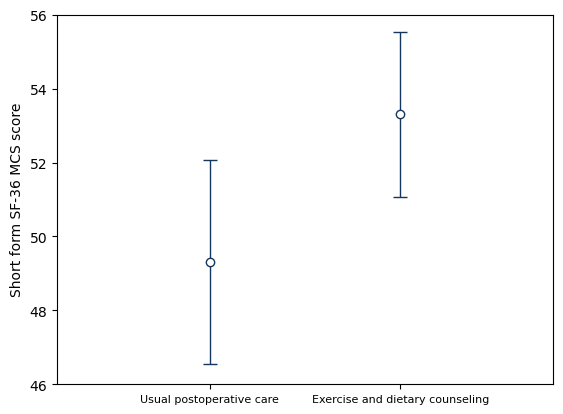

In [81]:
# Example 6: Plot 95% confidence intervals

import matplotlib.pyplot as plt

# Read means and errors from dataframe
means = sf36DF['m'].to_numpy()
uppers = sf36DF['upper'].to_numpy()
margin_of_errors = uppers - means

# Set color
color_1 = '#15365d' # Dark blue

# Set categories
categories = ['Usual postoperative care', 'Exercise and dietary counseling']

# Set positions
positions = [1,2]

# Set plot environment
fig, ax = plt.subplots()

# Plot error bars
ax.errorbar(positions, means, 
             yerr=margin_of_errors, fmt='o', 
             capsize=5, 
             elinewidth=1,
             ecolor=color_1,
             markeredgecolor=color_1,
             markerfacecolor='white',
             markeredgewidth=1)

# Labeling Axes
plt.ylabel('Short form SF-36 MCS score')

# Adjust the spacing between categories
ax.set_xticks(positions,categories,fontsize=8)
ax.set_xlim(0.2, 2.8)

# Set Y-axis limits
plt.ylim(46, 56)

# Show plot
plt.show()


If the code is correct, you should see the following plot.

![____](https://biologicslab.co/BIO5853/images/module_03/lesson_03_3_image09.png)

### **Exercise 6: Plot 95% Confidence Intevals**

In the cell below, plot the 95% Confidence Intervals for your platelet aggregation dataset.

_Code Description:_

The code below requires two sets of values: (1) the mean values of the "before" and "after" datasets. 

In [82]:
# Exercise 6: 
import numpy as np

# Create numpy arrays from DataFrame
x1 = paDF['Before'].to_numpy()
x2 = paDF['After'].to_numpy()

# Compute means
mean_1 = np.mean(x1)
mean_2 = np.mean(x2)

# Compute standard deviations
std_1 = np.std(x1)
std_2 = np.std(x2)

# Determine sample size
n = x1.size

# Calculate the standard error
SE_1 = std_1 / np.sqrt(n)
SE_2 = std_2 / np.sqrt(n)

# Z-score for 95% confidence interval
Z = 1.96

# Calculate the margin of error
ME_1 = Z * SE_1
ME_2 = Z * SE_2

# Calculate the confidence interval
CI_lower_1 = mean_1 - ME_1
CI_upper_1 = mean_1 + ME_1
CI_lower_2 = mean_2 - ME_2
CI_upper_2 = mean_2 + ME_2

# Print the results
print("----Solving Margin of Error-----------------------------")
print(f"Mean 1 (x\u0305) = {mean_1:.2f}")
print(f"Mean 2 (x\u0305) = {mean_2:.2f}")
print(f"Standard deviation 1 (s) = {std_1:.2f}")
print(f"Standard deviation 2 (s) = {std_1:.2f}")
print(f"95% Confidence Interval 1: ({CI_lower_1:.2f}, {CI_upper_1:.2f})")
print(f"95% Confidence Interval 2: ({CI_lower_2:.2f}, {CI_upper_2:.2f})")
print(f"Margin of Error 1: = {mean_1 - CI_lower_1:.2f}") 
print(f"Margin of Error 2: = {mean_2 - CI_lower_2:.2f}")

----Solving Margin of Error-----------------------------
Mean 1 (x̅) = 42.18
Mean 2 (x̅) = 52.45
Standard deviation 1 (s) = 14.89
Standard deviation 2 (s) = 14.89
95% Confidence Interval 1: (33.38, 50.98)
95% Confidence Interval 2: (42.14, 62.77)
Margin of Error 1: = 8.80
Margin of Error 2: = 10.31


Now that you have calculated the two mean values (`Mean 1`) and (`Mean 2`) and the two margin of error (`Margin of Error 1`, `Margin of Error 2`), you can manually enter them into your code cell below.

You will need to change this code chunk from Example 6:

~~~text
# Read means and errors from dataframe
means = sf36DF['m'].to_numpy()
uppers = sf36DF['upper'].to_numpy()
margin_of_errors = uppers - means
~~~

In other words, instead of reading these values from a DataFrame, use the output above and manually enter the values.

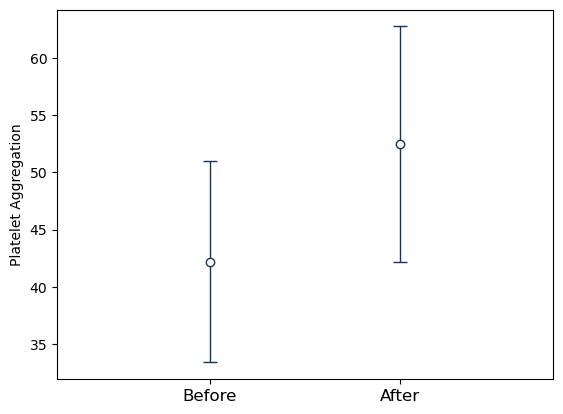

In [83]:
# Insert your code for Exercise 6 here

import matplotlib.pyplot as plt

# Enter values manually
means = [42.18, 52.45]  # Mean values
margin_of_errors = [8.80, 10.31]  # Margin of error

# Set color
color_1 = '#15365d' # Dark blue

# Data categories
categories = ['Before', 'After']

# Set positions
positions = [1,2]

# Set plot environment
fig, ax = plt.subplots()

# Plot error bars
ax.errorbar(positions, means, 
             yerr=margin_of_errors, fmt='o', 
             capsize=5, 
             elinewidth=1,
             ecolor=color_1,
             markeredgecolor=color_1,
             markerfacecolor='white',
             markeredgewidth=1)

# Labeling Axes
plt.ylabel('Platelet Aggregation')

# Adjust the spacing between categories
ax.set_xticks(positions,categories,fontsize=12)
ax.set_xlim(0.2, 2.8)

# Set Y-axis limits
#plt.ylim(46, 56)

# Show plot
plt.show()


If your code is correct, you should see the following plot.

![____](https://biologicslab.co/BIO5853/images/module_03/lesson_03_3_image16.png)

By visual inspection you can see considerable overlap in the error bars between the 'Before' and 'After' measurements. This would suggest that the two group means are **_not_** significantly different, but you would need to perform a two sample t-test to confirm this conclusion. 

## **Unequal Variance**

We now turn to the situation in which the variances of the two populations are not assumed to be  equal. In this case, a modified version of the two-sample t-test – sometimes called Welch’s t-test –  must be applied. Instead of using s 2  p as an estimate of the common variance σ 2, we substitute s 2  1  for σ 2  1 and s 2  2 for σ 2  2. Therefore, the appropriate test statistic is  t  =  (x¯1 − x¯2) − (µ1 − µ2)  q  (s  2  1 /n1) + (s 2  2 /n2)  . 


$$ z = \frac{\bar{x} - \mu}{\frac{\sigma}{\sqrt{n}}} $$ 

$$ Z = \frac{\bar{X} - \mu}{\sigma / \sqrt{n}} $$

has an approximate standard normal distribution if the value of _n_ is sufficiently large. For a given  sample with mean $\bar{x}$, we can calculate the corresponding outcome of $Z$, called the test statistic. We can then use a computer program to determine the probability of obtaining a value of Z that is as extreme or more extreme than the one observed. By “more extreme,” we mean farther away from $µ_0$ in the direction of the alternative hypothesis. Because it relies on the standard normal distribution, a test of this kind is called a **_one-sample z-test_**.  

When the population standard deviation is not known, we substitute the sample value $s$ for $σ$. If the underlying population is normally distributed, the random variable  

$$ t = \frac{\bar{X} - \mu_0}{s / \sqrt{n}} $$

has a _t_ distribution with n − 1 degrees of freedom. In this case, we can calculate the outcome of _t_  corresponding to a given $\bar{x}$ and consult our computer program to find the probability of obtaining a sample mean that is more extreme than the one observed. This procedure is known as a **_one-sample t-test_**. 

(Pagano, Marcello; Gauvreau, Kimberlee; Mattie, Heather. Principles of Biostatistics (p. 230). CRC Press. Kindle Edition.) 


## **Sample Size Estimate for Two Means**

The method developed in Chapter 10 for determining the sample size necessary to achieve a certain power when conducting a one-sample hypothesis test for a mean can be extended for two-sample tests on means. The specific formula used depends on whether we are working with paired or independent samples. Considering paired samples first, return to the study of children with serious heart disease who participated in a 12-week exercise rehabilitation program. We conducted a paired _t_-test to evaluate the null hypothesis that $\delta$, the mean difference in peak work rate from baseline to the end  of the program, is equal to 0. The alternative hypothesis was that $\delta$ is not equal to $\theta$ 0. When planning this study, before collecting any data, the investigators might have wished to determine the sample size necessary to provide 80% power to reject the null hypothesis if the true mean difference was as high as 6 watts. Recall that 80% power means that if the null hypothesis is false, the probability is `0.80` that it will be rejected. For a one-sample test, two-sided test on a mean, the formula for calculating sample size is  

$$ n = \left( \frac{(Z_{1-\alpha/2} + Z_{1-\beta}) \cdot \sigma}{\mu_1 - \mu_0} \right)^2 $$

Where:

* $Z_{1-\alpha/2}$ is the Z-score for the desired confidence level.
* $Z_{1-\beta}$ is the Z-score for the desired power.
* $\sigma$ is the standard deviation.
* $\mu_1 - \mu_0$ is the difference in means.


### Example 7: Compute minimum sample size - One-Sample Test

The code in the cell below provides a Python program that you can use to compute the minimum sample size for a **_one-sample test_**. It requires the 4 specific values shown above:

1. $Z_{1-\alpha/2}$ is the Z-score for the desired confidence level.
2. $Z_{1-\beta}$ is the Z-score for the desired power.
3. $\sigma$ is the standard deviation.
4.  $\mu_1 - \mu_0$ is the difference in means.

The four values used in Example 7 were taken from the example on page 266 in your textbook.

In [89]:
# Example 7: Compute minimum sample size- One-sample test

import math
from scipy.stats import norm

# Define parameters
alpha = 0.05  # Z-score for the desired confidence level
power = 0.8   # Z-score for the desired power.
sigma = 9.0  # standard deviation
delta = 6.0   # difference in means

def calculate_sample_size(alpha, power, sigma, delta):
    # Z-score for the desired confidence level (1 - alpha/2)
    z_alpha = norm.ppf(1 - alpha / 2)
    
    # Z-score for the desired power (1 - beta)
    z_beta = norm.ppf(power)
    
    # Calculate the sample size
    n = ((z_alpha + z_beta) * sigma / delta) ** 2
    
    return math.ceil(n)

# Example parameters
alpha = 0.05  # Z-score for the desired confidence level
power = 0.8   # Z-score for the desired power.
sigma = 9.0  # standard deviation
delta = 6.0   # difference in means

sample_size = calculate_sample_size(alpha, power, sigma, delta)

print("----Solving Sample Size-----------------------------")
print(f"Significance level = {alpha:.2f}")
print(f"Power = {power:.2f}")
print(f"Standard deviation = {sigma:.2f}")
print(f"Difference in means = {delta:.2f}")
print(f"Minimum sample size = {sample_size}")


----Solving Sample Size-----------------------------
Significance level = 0.05
Power = 0.80
Standard deviation = 9.00
Difference in means = 6.00
Minimum sample size = 18


If the code is correct, you should see the following output:

~~~text
----Solving Sample Size-----------------------------
Significance level = 0.05
Power = 0.80
Standard deviation = 9.00
Difference in means = 6.00
Minimum sample size = 18
~~~

You should note that `Minimum sample size = 18` is exactly the same result computed in your textbook on page 266:

>A sample of 18 children is needed to achieve 80% power.

### Example 8: Compute minimum sample size - Two-sample Test

The code in the cell below can be used to solve a Two-sample test using the following equation:

$$ n = \frac{(\bar{x}_1 - \bar{x}_2 \pm z_{\alpha/2}\sqrt{\frac{\sigma_1^2}{n_1} + \frac{\sigma_2^2}{n_2}})^2}{(\mu_1 - \mu_2)^2} $$

>For the study investigating the effects of antihypertensive drug treatment on adults over the age of 60 suffering from isolated systolic hypertension, suppose that the investigators believed they would see an 8 mm Hg difference in systolic blood pressure between those receiving active drug and those receiving placebo. If this were true, we might want to have 90% power to detect a difference of this magnitude using a two-sided test conducted at the 0.05 level of significance. Although it is not required that the two population standard deviations be the same, we assume that $\sigma_1 = \sigma_2  = 20 \text { mm  Hg}. $

In [95]:
# Example 8: Compute sample size = Two-sample test

import scipy.stats as stats

# Define values
alpha = 0.05
beta = 0.10
std_dev1 = 20  # σ₁ example value
std_dev2 = 20  # σ₂ example value
mean_diff = 8  # (μ₁ - μ₂) example value

# Calculate z-scores from alpha and beta
z_alpha_half = stats.norm.ppf(1 - alpha / 2)
z_beta = stats.norm.ppf(1 - beta)

# Calculate n using the given formula
nominator = ((z_alpha_half + z_beta)**2 * (std_dev1**2 + std_dev2**2))
denominator = mean_diff**2

# Compute sample size
sample_size_n = nominator / denominator

print("----Solving Sample Size-----------------------------")
print(f"Significance level = {alpha:.2f}")
print(f"Power = {1-beta:.2f}")
print(f"Standard deviation 1 = {std_dev1:.2f}")
print(f"Standard deviation 2 = {std_dev2:.2f}")
print(f"Difference in means = {mean_diff:.2f}")
print(f"Minimum sample size = {sample_size_n:.1f}")
#print(f"The required sample size n is: {sample_size_n}")


----Solving Sample Size-----------------------------
Significance level = 0.05
Power = 0.90
Standard deviation 1 = 20.00
Standard deviation 2 = 20.00
Difference in means = 8.00
Minimum sample size = 131.3


If the code is correct, you should see the following output:

~~~text
----Solving Sample Size-----------------------------
Significance level = 0.05
Power = 0.90
Standard deviation 1 = 20.00
Standard deviation 2 = 20.00
Difference in means = 8.00
Minimum sample size = 131.3
~~~

You should note that `Minimum sample size = 131.3` is the same result computed in your textbook on page 267:

>In order to achieve 90% power, 132 adults would be required in each of the two groups, for a total sample size of 264.

## **Lesson Turn-in**

When you have completed and run all of the code cells, create a PDF of your notebook and upload the **_PDF_** to your Lesson_03_3 assignment in Canvas for grading.
